# Task 1 - Data Engineering

#### Data is the fuel for nearly any kind of image-based detection challenge nowadays. If not used for training (i.e. the learning of suitable model parameters), a dataset must be present at least for evaluating the performance of a proposed approach. Thus, the acquisition and preparation of data forms a vital step in designing and developing a detection system.

#### a) Data acquisition: Take a walk around an urban area and look out for cracks in buildings[1] Use your camera, e.g. the camera of your phone, to take pictures of cracks. Important: respect the legal restrictions when taking pictures of other peoples’ property. For buildings that primarily refers to[2]:

#### • Stay on public ground (do not enter private ground without permission).
#### • Do not invade the owners privacy by using aids such as drones, sticks, ladders, etc.
#### • Make sure to not capture artwork in a way violating copyright law.
#### • Preserve peoples’ anonymity by not capturing other people, the door bell nameplates, etc.

In [75]:
# Import libraries
import os
import cv2
import matplotlib.pyplot as plt

In [76]:
# Image directory
path = "Captured Images/"

#total images in a directory
total_images = len(os.listdir(path))
print("Total images in a directory: ", total_images)

Total images in a directory:  16


In [77]:
# Print images
for image in os.listdir(path):
    print(image)

Amalienstrasee.png
Burgplatz.png
DRK Servicegesellschaft.png
Eckermann Buchhandlung.png
Fritz Mitte Schuetzengasse Weimar 1.png
Grill Imbiss Theaterplatz.png
Guckkasten Bastille.png
Jakobsplan 1 Enterance.png
Jakobsplan 1.png
Jakobsplan Main door.png
Laubbrunnen 3.png
Libnizalla 10b.png
Schuetzengasse 2.png
Stoff-Art.png
Studienzentrum.png
Universitaetsbibliothek.png


In [78]:
# Function to load and resize images
def load_data(path, target_size=(512, 512)):
    images = []
    for filename in os.listdir(path):
        img = cv2.imread(os.path.join(path, filename))
        if img is not None:
            # Resize the image to the target size
            img = cv2.resize(img, target_size)
            images.append((filename, img))
    return images

# Function to plot images in rows of 4
def plot_images(images):
    num_images = len(images)
    rows = (num_images + 3) // 4  
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))  

    for i in range(rows):
        for j in range(4):
            index = i * 4 + j
            if index < num_images:
                filename, img = images[index]
                axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                axes[i, j].set_title(filename)
                axes[i, j].axis('on')
            else:
                axes[i, j].axis('on')  
    plt.title("Cracks in Buildings")
    plt.tight_layout()
    plt.show()

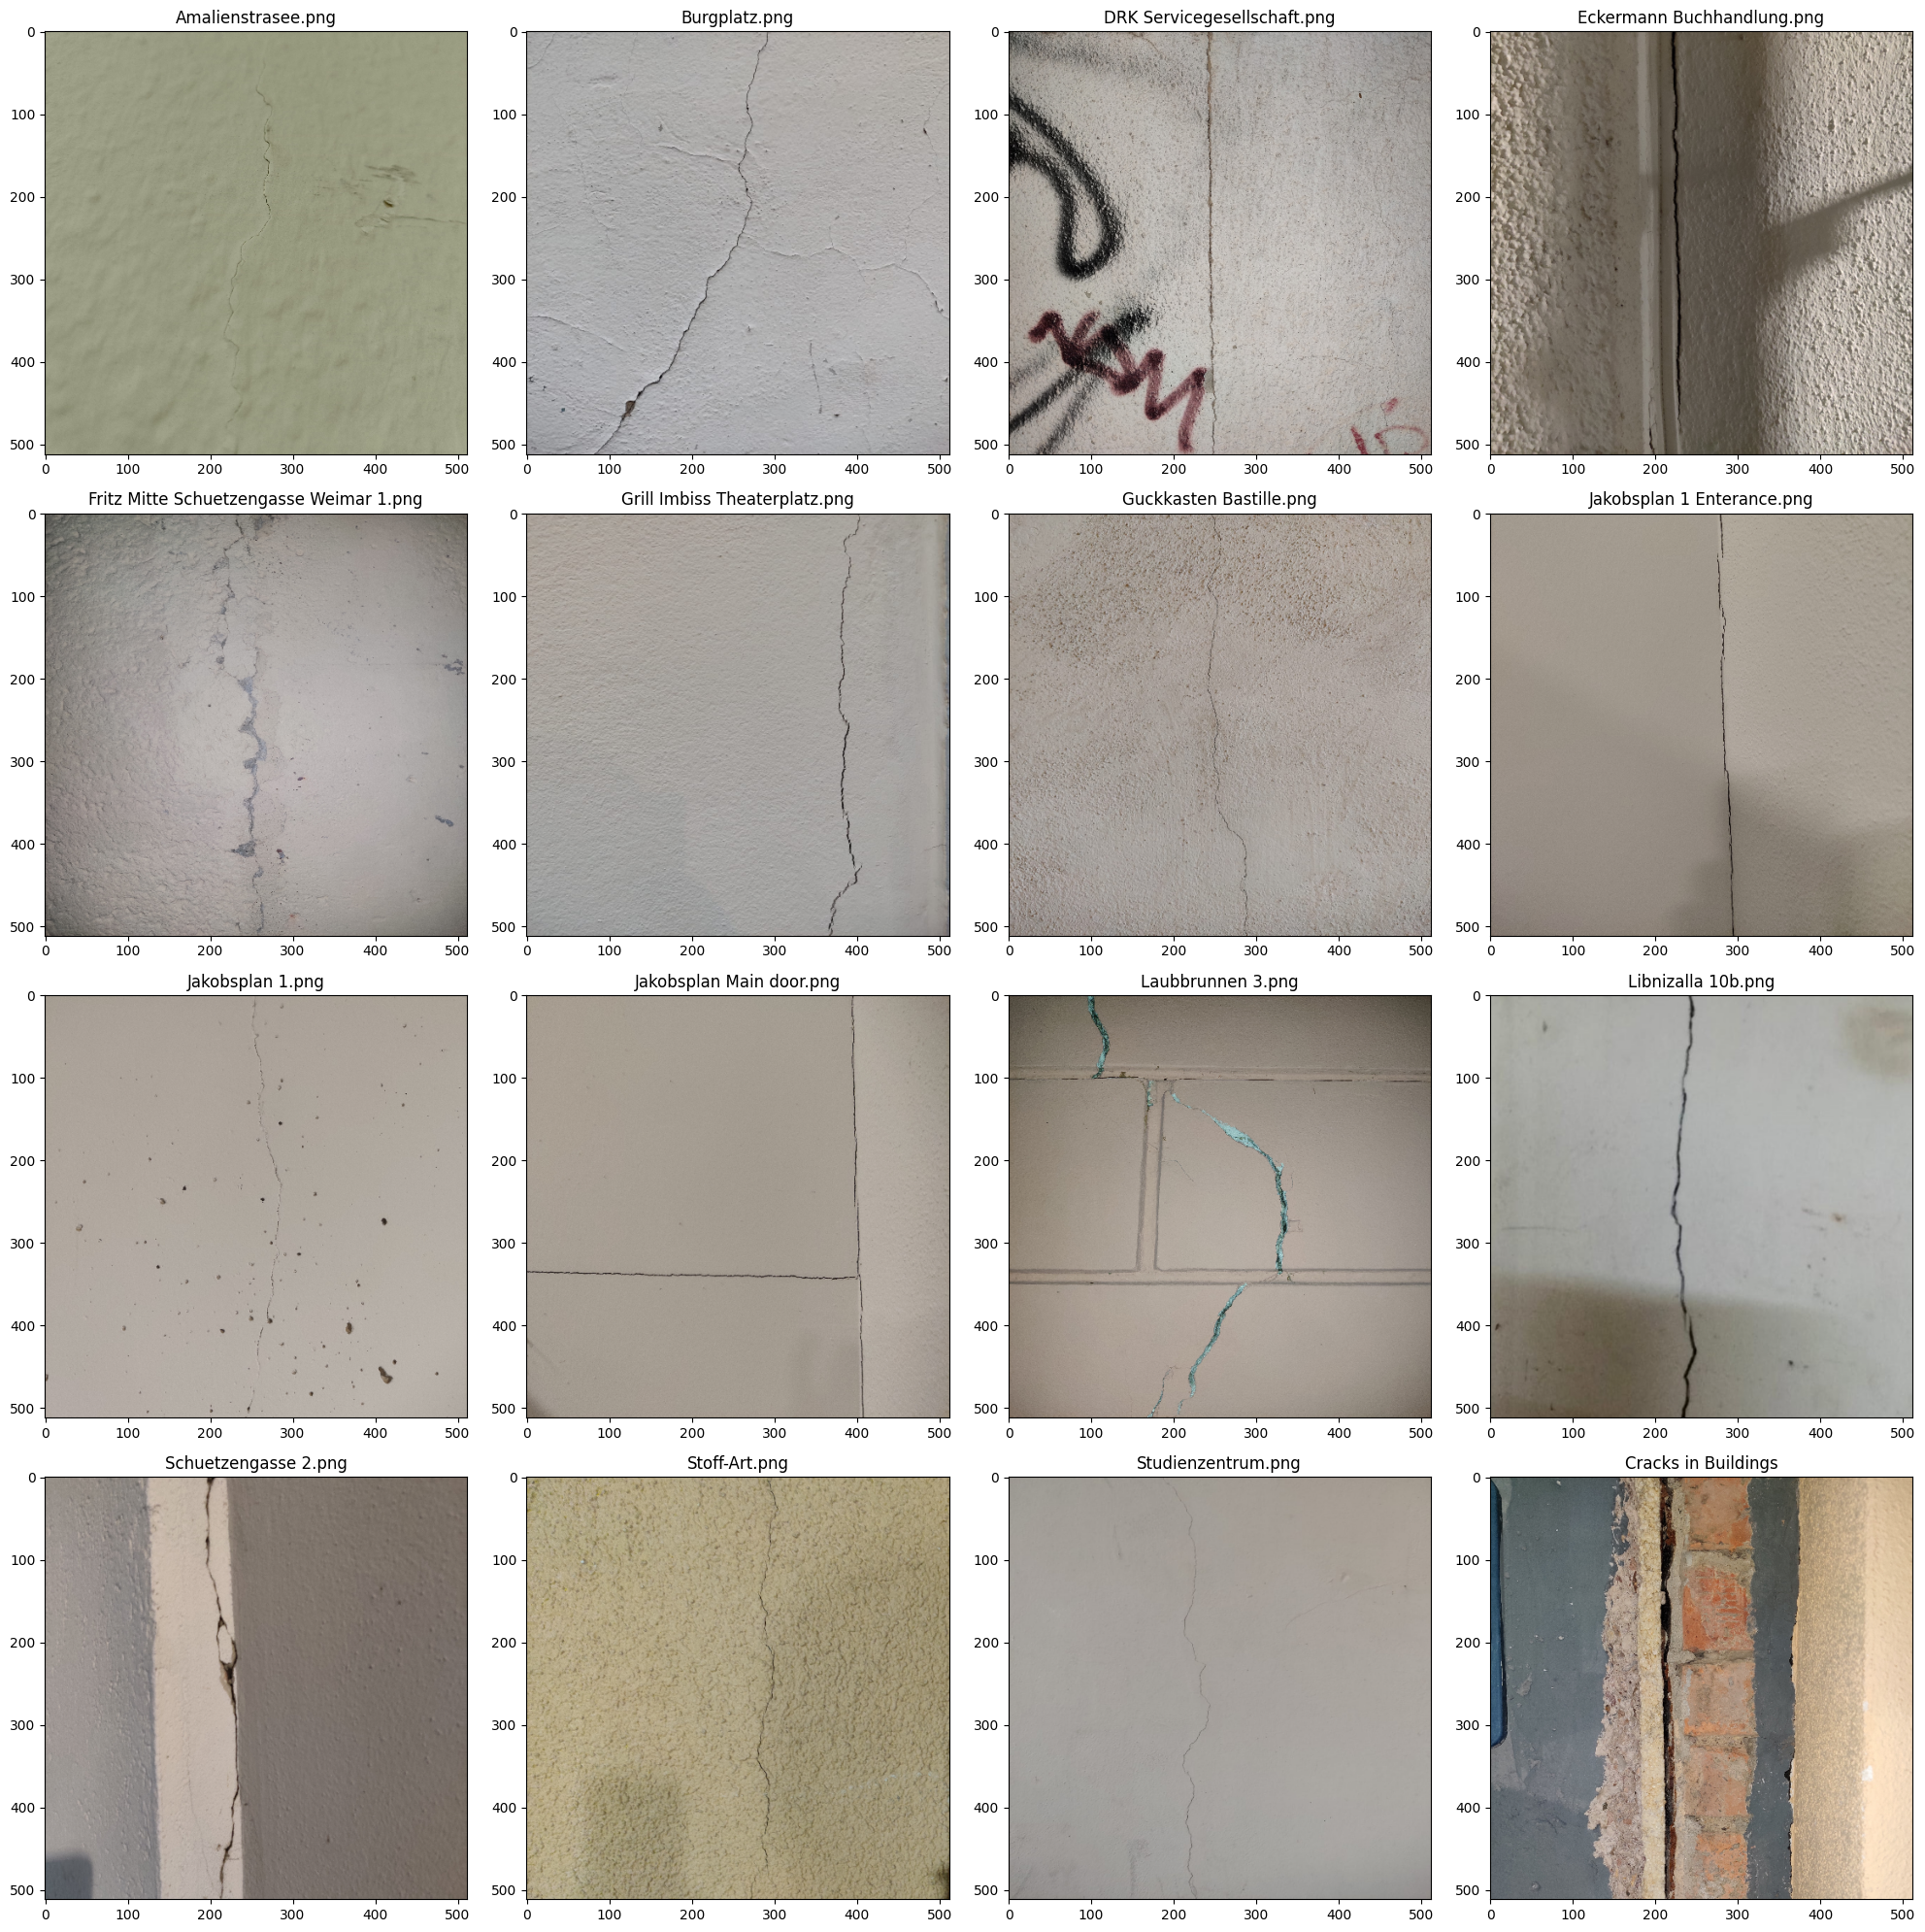

In [79]:
# Load the images
images = load_data(path)

# Plot the loaded images
plot_images(images)

#### b) Data annotation: Supervised learning requires annotations (also referred to as labels or ground truth) for each input image. For semantic segmentation these labels are of same height and width as the input image. The pixel values represent the true class of the pixel. It is recommended to use values 0 for no-crack and 255 for crack. Figure 1 shows input images alongside their respective annotations. For annotation you can use basic image manipulation software such as GIMP3 or more advanced tools such as the Computer Vision Annotation Tool (CVAT)4.

In [80]:
annotation_path = "annotations/"

# Function to plot images in rows of 4 from a folder
def plot_annotation_images(annotation_path):
    images = []
    for filename in os.listdir(annotation_path):
        img = cv2.imread(os.path.join(annotation_path, filename))
        if img is not None:
            images.append((filename, img))

    num_images = len(images)
    rows = (num_images + 3) // 4
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))

    for i in range(rows):
        for j in range(4):
            index = i * 4 + j
            if index < num_images:
                filename, img = images[index]
                axes[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                axes[i, j].set_title(filename)
                axes[i, j].axis('on')
            else:
                axes[i, j].axis('off')

    plt.title("Images from Annotation Folder")
    plt.tight_layout()
    plt.show()

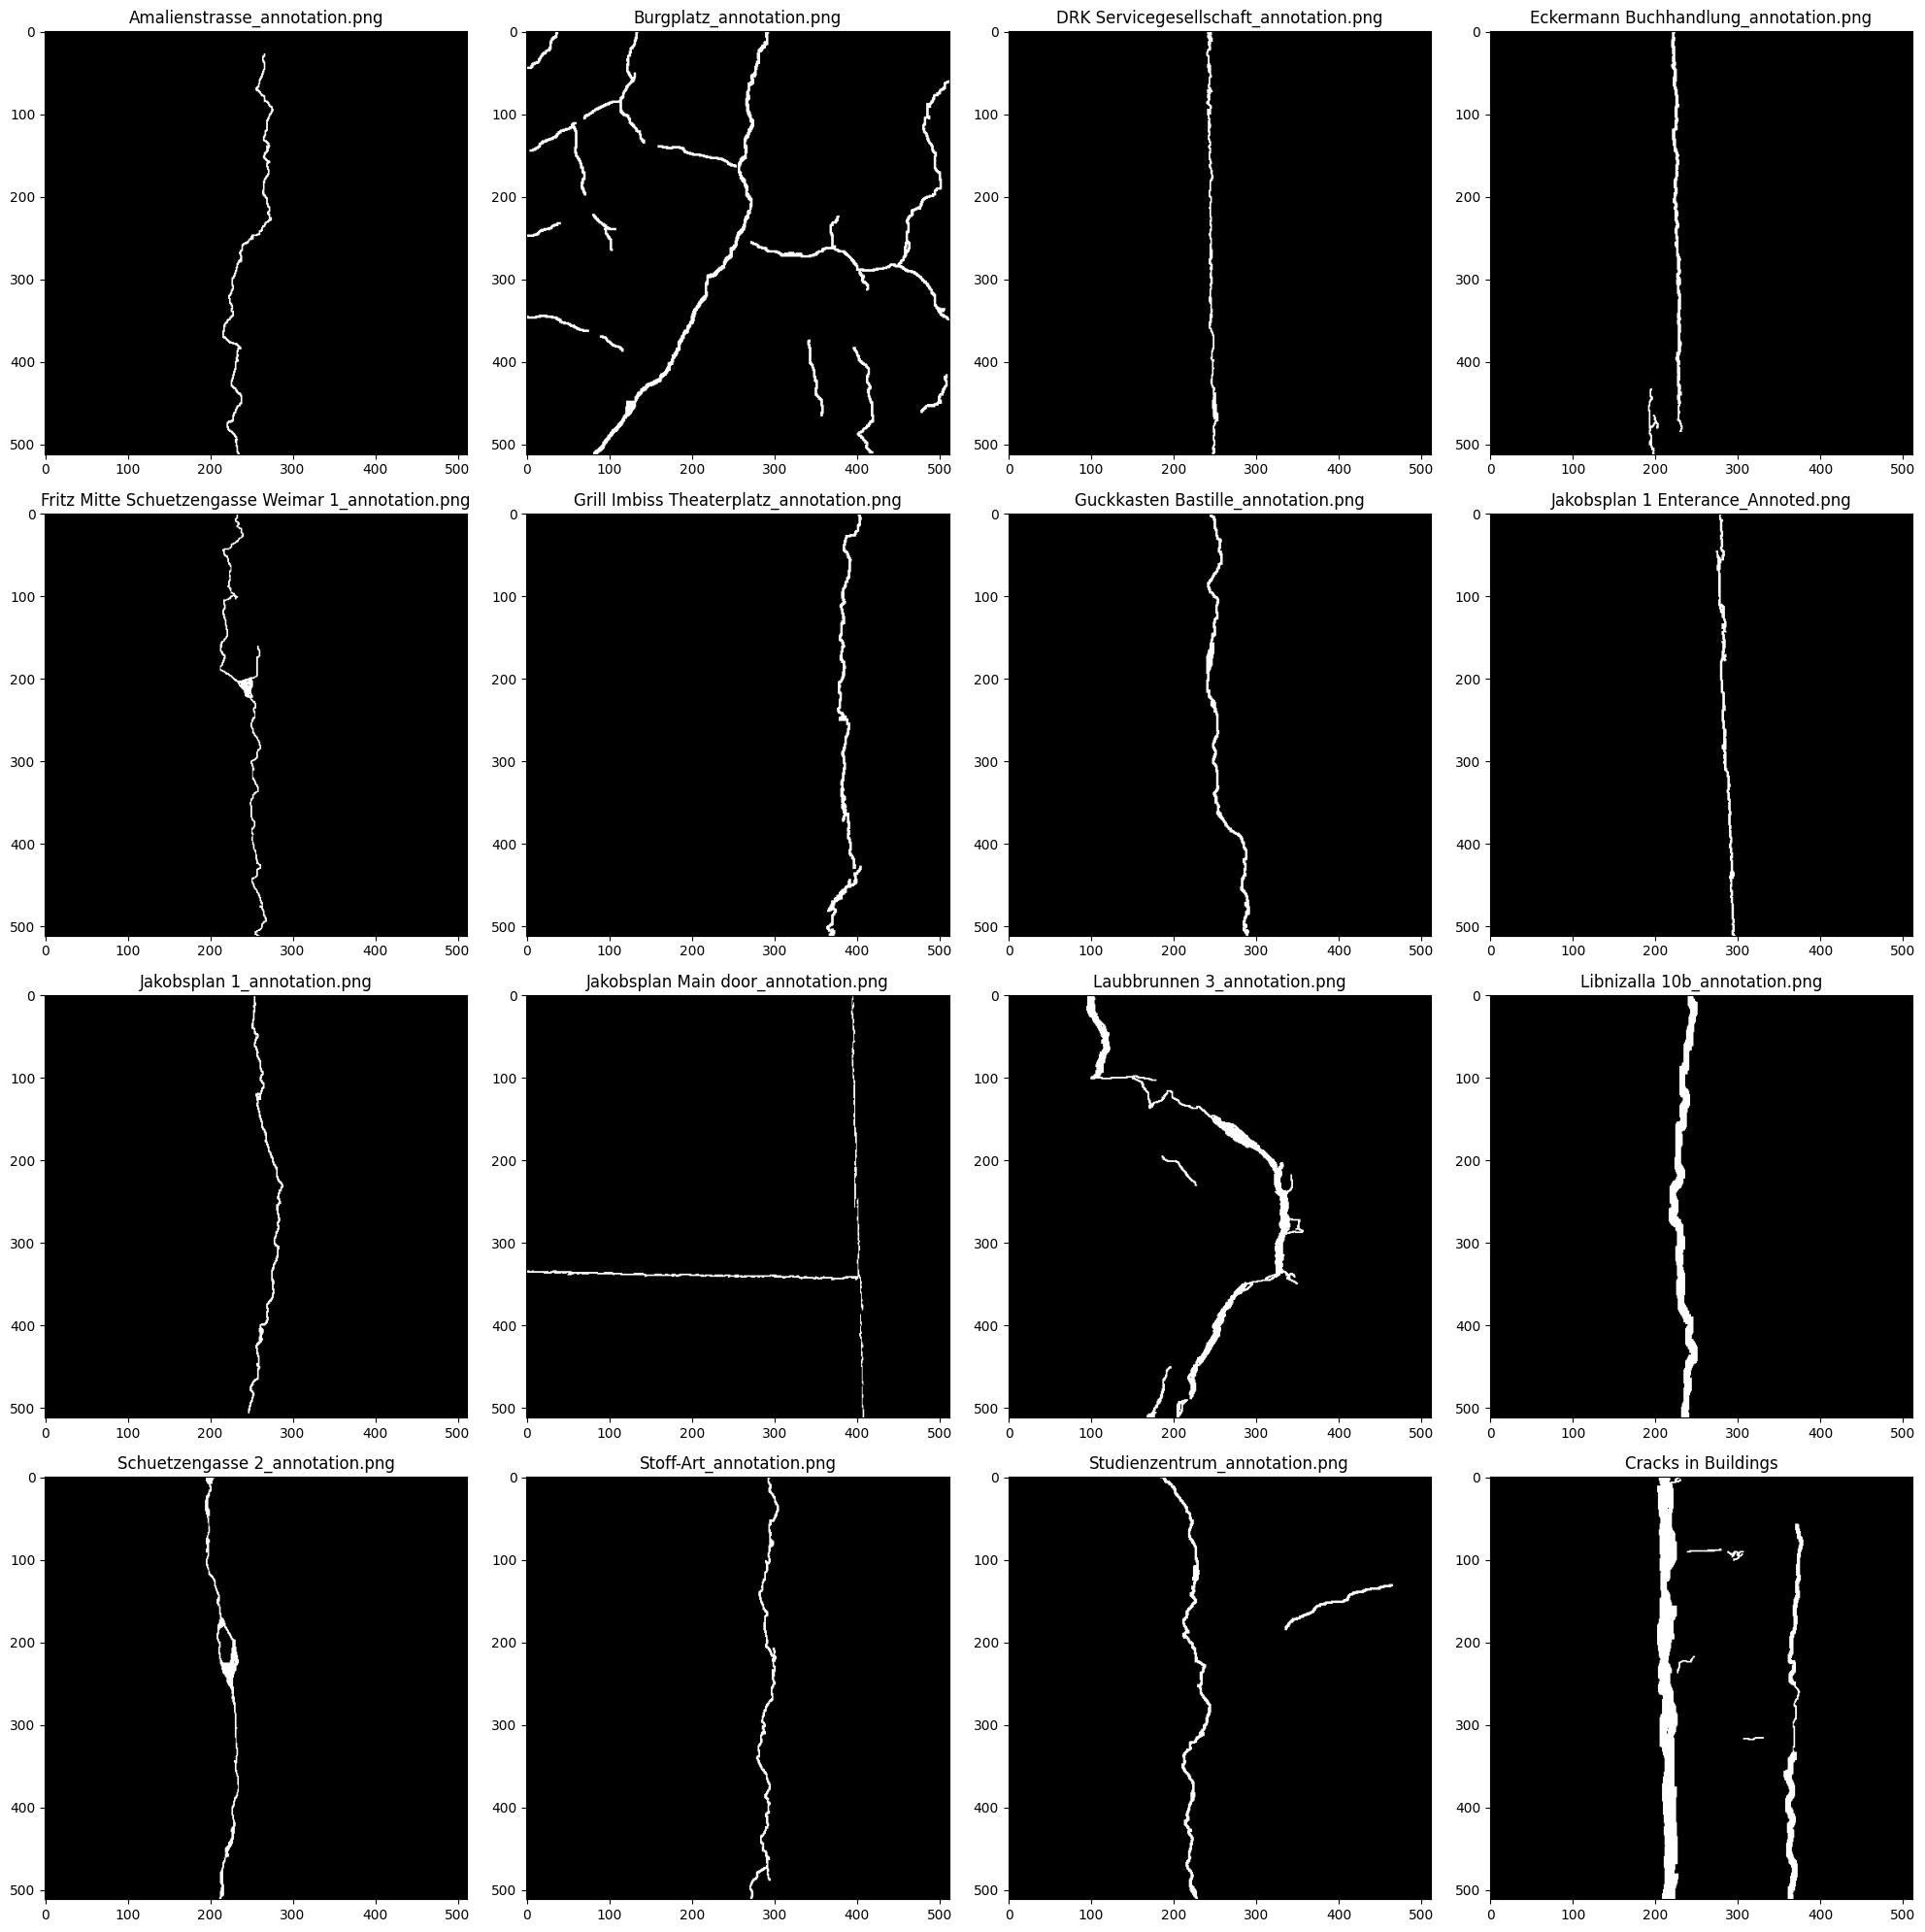

In [81]:
# Load the images
images = load_data(annotation_path)

# Plot the loaded images
plot_images(images)

#### c) Data split: In order to evaluate the performance of your approach, you keep the dataset used during development separate from a test set. Thus, split your dataset into a subset for training/development ( 80%) and testing ( 20%). The test set should only be used once on the final version of your approach.

Reference: https://cs230.stanford.edu/blog/split/

For the Dataset to create a repository used the above refernce and splittted the dataset manually. As I had the only few images I done Data Splitting manually in which I had to place the images. The below code splits the data as 80% for training and remaining 10% for the test. Splitting into validation is also a good practice as I learnt in the lecture series so 10% for the validation which helps in Fine-tuning.

In [ ]:
import os
import random
import shutil

# Define the paths to your augmented dataset and where you want to save the split datasets
augmented_dataset_root = "augmented_dataset"
output_root = "split_dataset"

# Define the split ratio
train_ratio = 0.8
test_ratio = 0.2

# Create output directories
os.makedirs(output_root, exist_ok=True)
os.makedirs(os.path.join(output_root, "train"), exist_ok=True)
os.makedirs(os.path.join(output_root, "test"), exist_ok=True)

# Get a list of all image files in the augmented dataset directory
image_files = [f for f in os.listdir(augmented_dataset_root) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
random.shuffle(image_files)

# Calculate the number of images for training and testing
num_samples = len(image_files)
num_train = int(train_ratio * num_samples)

# Split the images into training and testing sets
train_files = image_files[:num_train]
test_files = image_files[num_train:]

# Copy the files to the respective train and test folders
for file in train_files:
    source_file = os.path.join(augmented_dataset_root, file)
    target_file = os.path.join(output_root, "train", file)
    shutil.copy2(source_file, target_file)

for file in test_files:
    source_file = os.path.join(augmented_dataset_root, file)
    target_file = os.path.join(output_root, "test", file)
    shutil.copy2(source_file, target_file)

print("Dataset split complete.")


#### d) Data augmentation: It can optionally be helpful to use data augmentation on the acquired dataset. By applying basic transformations such as rotation, flipping, contrast shrinking, brightness shift, etc. the dataset can artificially be expanded without need of additional data collection or annotation.

![Alt text](image-3.png)

Source: 
1. https://www.tutorialspoint.com/python_pillow/python_pillow_flip_and_rotate_images.htm

2. https://note.nkmk.me/en/python-opencv-numpy-rotate-flip/

In [97]:
# Define the directory where your original images are stored
input_directory = "annotations"

# Define the directory where you want to save the augmented images
augmented_images_rotation = "augmented_dataset"


# Define the rotation angles (in degrees) for augmentation
rotation_angles = [15, 30, 45]

# Loop through the original images and apply rotation and flipping augmentation
for filename in os.listdir(input_directory):
    image = cv2.imread(os.path.join(input_directory, filename))
    
    if image is not None:
        # Apply rotation augmentation for each specified angle
        for angle in rotation_angles:
            rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
            rotated_filename = f"{os.path.splitext(filename)[0]}_rotate_{angle}.png"
            output_path = os.path.join(augmented_images_rotation, rotated_filename)
            cv2.imwrite(output_path, rotated_image)

        # Apply horizontal flipping augmentation
        flipped_image = cv2.flip(image, 1)
        flipped_filename = f"{os.path.splitext(filename)[0]}_flip.png"
        output_path = os.path.join(augmented_images_rotation, flipped_filename)
        cv2.imwrite(output_path, flipped_image)

print("Data augmentation (rotation and flipping) complete.")


Data augmentation (rotation and flipping) complete.


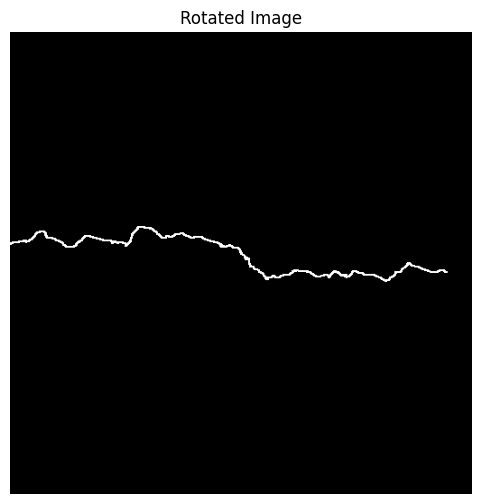

In [114]:
# Plot 
directory = "augmented_dataset"
augmented_images = [os.path.join(directory, filename) for filename in os.listdir(directory)]
image_to_plot = augmented_images[5] 
augmented_image = cv2.imread(image_to_plot)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis("off")
plt.show()



In [99]:
import os
import cv2

# original images directory
input_directory = "annotations"
output_directory = "augmented_dataset"
os.makedirs(output_directory, exist_ok=True)

# contrast adjustment factor (e.g., 0.7 for contrast shrinking)
contrast_factor = 0.7  

for filename in os.listdir(input_directory):
    image_path = os.path.join(input_directory, filename)
    img = cv2.imread(image_path)

    if img is not None:
       
        adjusted_image = cv2.convertScaleAbs(img, alpha=contrast_factor, beta=0)

        output_filename = os.path.splitext(filename)[0] + "_contrast_shrinked.png"
        output_path = os.path.join(output_directory, output_filename)
        cv2.imwrite(output_path, adjusted_image)

print("Contrast shrinking augmentation complete.")


Contrast shrinking augmentation complete.


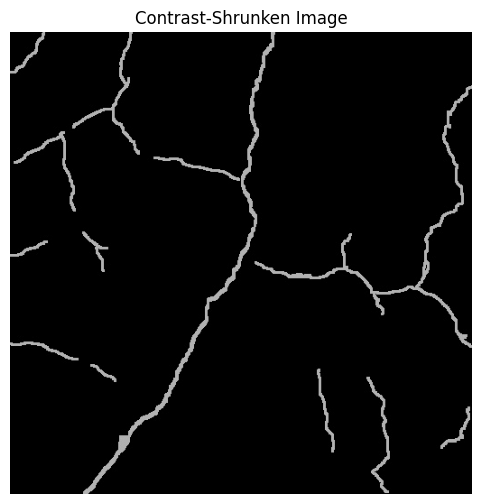

In [96]:
# Get a list of all the augmented images in the output directory
augmented_images = [os.path.join(output_directory, filename) for filename in os.listdir(output_directory)]
image_to_plot = augmented_images[5]
augmented_image = cv2.imread(image_to_plot)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))
plt.title("Contrast-Shrunken Image")
plt.axis("off")
plt.show()

#### e) Datasets statistics: Present basic statistics of the dataset such as the number of images, number of pixels, intensity distribution, the number of labeled pixels, etc. in tables and/or plots.

In [100]:
dataset_root = "split_dataset"

In [106]:
# Function to calculate basic statistics of a dataset subset
def calculate_subset_statistics(subset_directory, labeled_pixel_value=1):
    image_count = 0
    total_pixels = 0
    labeled_pixels = 0
    intensity_distribution = np.zeros(256, dtype=int)

    for class_name in ["train", "test"]:
        class_directory = os.path.join(subset_directory, class_name)

        for filename in os.listdir(class_directory):
            image_path = os.path.join(class_directory, filename)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                # Update image count and total pixels
                image_count += 1
                total_pixels += img.size

                # Calculate intensity distribution
                unique, counts = np.unique(img, return_counts=True)
                intensity_distribution[unique] += counts

                # Update labeled pixels count
                labeled_pixels += np.sum(img == labeled_pixel_value)

    return {
        "Number of Images": image_count,
        "Number of Pixels": total_pixels,
        "Number of Labeled Pixels": labeled_pixels,
        "Intensity Distribution": intensity_distribution
    }

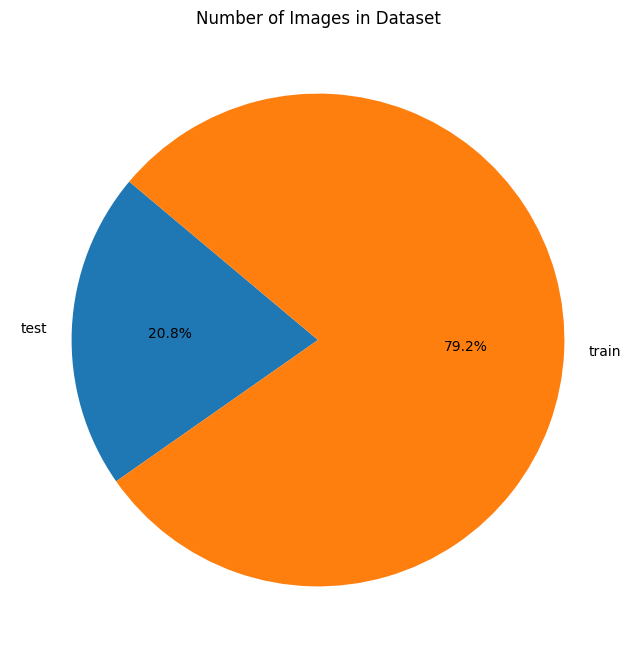

In [107]:
# Function to count the number of images in each class
def count_images_in_classes(directory):
    class_counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len(os.listdir(class_path))
            class_counts[class_name] = num_images
    return class_counts

# Get the count of images in each class
class_counts = count_images_in_classes(dataset_root)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Number of Images in Dataset")
plt.show()

{'Number of Images': 96, 'Number of Pixels': 25165824, 'Number of Labeled Pixels': 0, 'Intensity Distribution': array([24833178,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0,        0,        0,        0,        0,        0,
              0, 

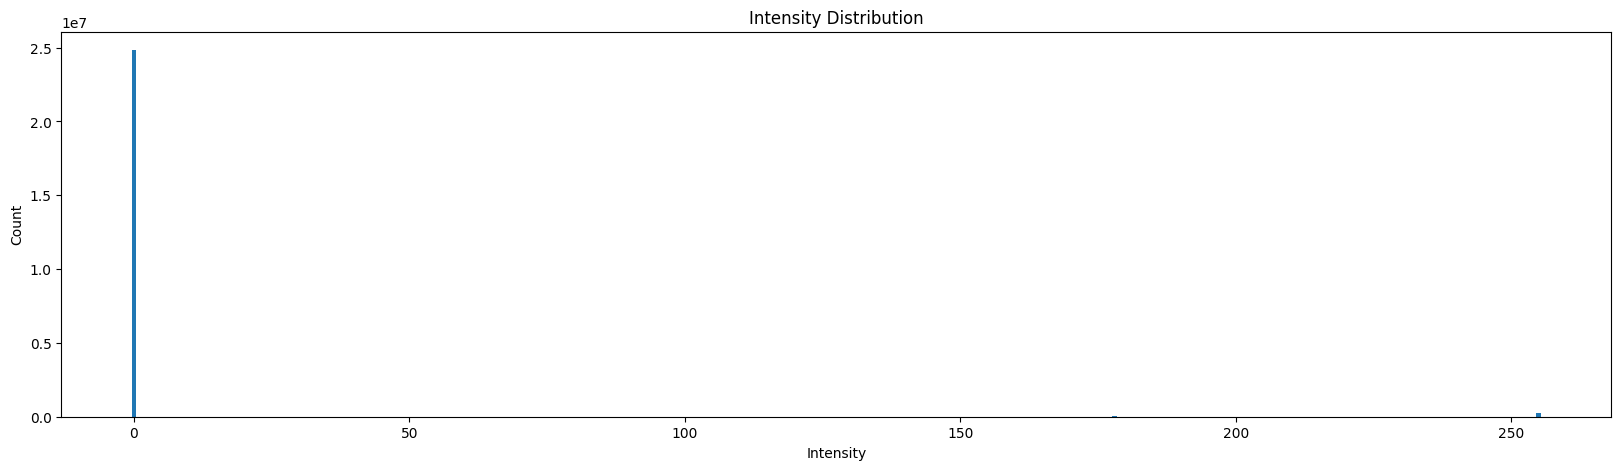

In [110]:
# Datasets statistics: number of pixels,the number of labeled pixels,
# and the intensity distribution of the labeled pixels
dataset_statistics = calculate_subset_statistics(dataset_root)
print(dataset_statistics)

# Function to plot the intensity distribution of a dataset
def plot_intensity_distribution(intensity_distribution):
    plt.figure(figsize=(20, 5))
    plt.bar(range(256), intensity_distribution)
    plt.title("Intensity Distribution")
    plt.xlabel("Intensity")
    plt.ylabel("Count")
    plt.show()
    
# Plot the intensity distribution of the labeled pixels
plot_intensity_distribution(dataset_statistics["Intensity Distribution"])



In [111]:
# Function to load images and compute histograms of the blue channel
def load_images_and_compute_blue_histograms(directory):
    blue_histograms = []
    
    for filename in os.listdir(directory):
        image_path = os.path.join(directory, filename)
        img = cv2.imread(image_path)
        
        if img is not None:
            # Extract the blue channel
            blue_channel = img[:, :, 0]
            
            # Compute histogram for the blue channel
            histogram = cv2.calcHist([blue_channel], [0], None, [256], [0, 256])
            blue_histograms.append((filename, histogram))
    
    return blue_histograms

In [112]:
# Function to plot histograms in rows of 4
def plot_blue_histograms(blue_histograms):
    num_histograms = len(blue_histograms)
    rows = (num_histograms + 3) // 4  
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
    
    for i in range(rows):
        for j in range(4):
            index = i * 4 + j
            if index < num_histograms:
                filename, histogram = blue_histograms[index]
                
                # Plot histogram for the blue channel
                hist = np.squeeze(histogram)
                axes[i, j].plot(range(256), hist, color='b')
                axes[i, j].set_title(filename)
                axes[i, j].set_xlim(0, 256)
                axes[i, j].set_ylim(0, max(hist) + 10)
                axes[i, j].set_xlabel("Blue Intensity")
                axes[i, j].set_ylabel("Pixel Count")
                axes[i, j].grid()
            else:
                axes[i, j].axis('off')
    
    plt.title("Blue Channel Histograms")
    plt.tight_layout()
    plt.show()

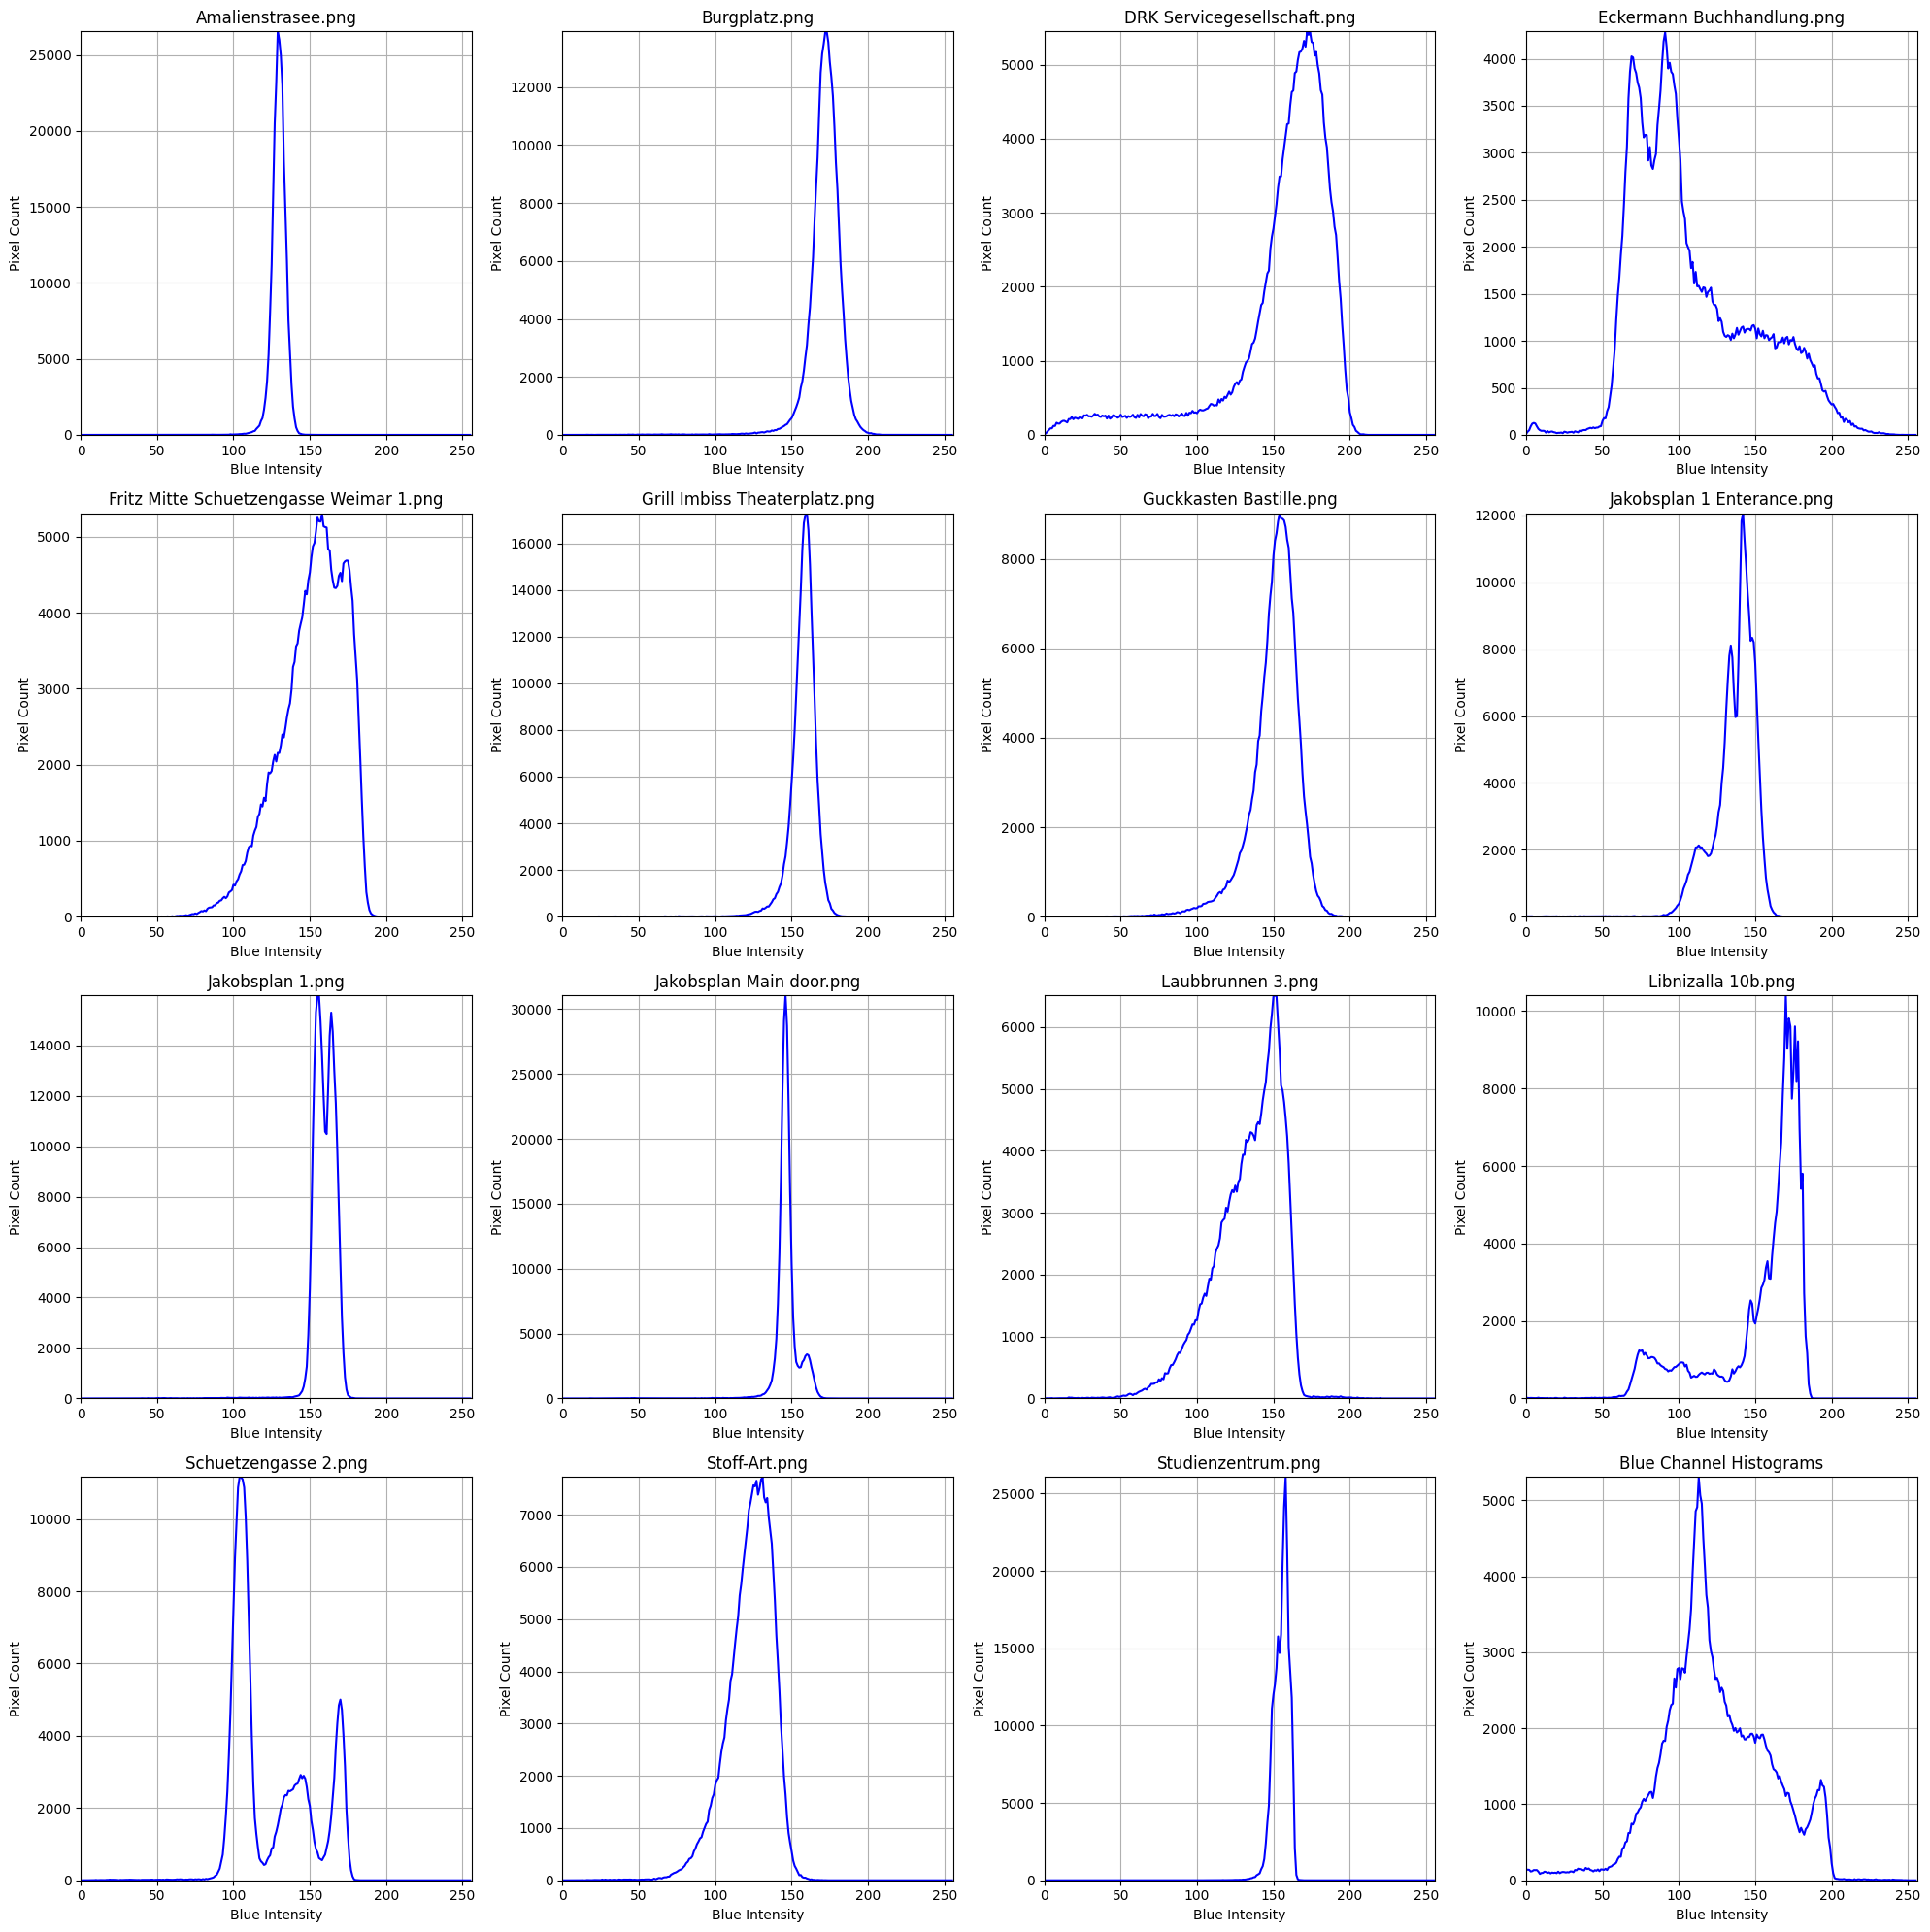

In [113]:
# Load images and compute blue channel histograms
blue_histograms = load_images_and_compute_blue_histograms(image_directory)

# Plot blue channel histograms
plot_blue_histograms(blue_histograms)